# Introduction to Keras

* high-level neural networks API, written in Python and capable of running on top of [TensorFlow](https://github.com/tensorflow/tensorflow), [CNTK](https://github.com/Microsoft/cntk), or [Theano](https://github.com/Theano/Theano)
* Allows easy and fast prototyping
* Runs seamlessly on CPU and GPU
* open source
* Documentation: [https://keras.io/](https://keras.io/)

## installation
First install the backend, for example [TensorFlow](https://www.tensorflow.org/install/).

`$ pip install keras`

## MNIST classification task

The MNIST data set is a database of handwritten digits that is commonly used for training various image processing systems. The goal if this task is to implement a classifier of handwritten digits using neural networks.

![Mnist data set](https://github.com/jirimaterna/image-processing-2days/blob/master/images/mnist-examples.png?raw=1)

## Load the data

The data is already shuffled and split to train and test parts.

In [1]:
import pickle
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train original shape: {}".format(X_train.shape))
print("y_train original shape: {}".format(y_train.shape))
print("X_test original shape: {}".format(X_test.shape))
print("y_test original shape: {}".format(y_test.shape))

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
X_train original shape: (60000, 28, 28)
y_train original shape: (60000,)
X_test original shape: (10000, 28, 28)
y_test original shape: (10000,)


Look at one random example.

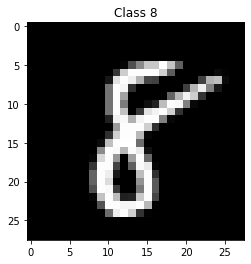

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
i=3495

#print(X_train[i])
plt.imshow(X_train[i], cmap='gray')
plt.title("Class {}".format(y_train[i]))
plt.show()

## Transform the data

We need to scale the input values to have the range (0,1).

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector.

In [4]:
X_train_flat = X_train.reshape(60000, 784)
X_test_flat = X_test.reshape(10000, 784)
print("X_train matrix shape: {}".format(X_train_flat.shape))
print("X_test matrix shape: {}".format(X_test_flat.shape))

X_train matrix shape: (60000, 784)
X_test matrix shape: (10000, 784)


Transform the targets into one-hot encoding, i.e.
```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
```
etc.

In [5]:
from keras.utils import np_utils

n_classes = 10

print(y_train[49])

y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

print(y_train[49])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## Architecture of one-layer classifier for MNIST

![Mnist data set](https://github.com/jirimaterna/image-processing-2days/blob/master/images/one-layer-nn.png?raw=1)

## Architecture definition

Create a sequential model

In [6]:
from keras.models import Sequential

model = Sequential()

Define its structure.

In [7]:
from keras.layers import Dense, Activation

model.add(Dense(64, input_shape=(784, )))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

Compile the model

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Train the model

In [9]:
model.fit(X_train_flat, y_train,
          batch_size = 128, epochs = 5, verbose=1,
          validation_data=(X_test_flat, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/5





60000/60000 [==============================] - 8s 130us/step - loss: 0.4021 - acc: 0.8870 - val_loss: 0.2005 - val_acc: 0.9406
Epoch 2/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.1724 - acc: 0.9490 - val_loss: 0.1425 - val_acc: 0.9567
Epoch 3/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.1264 - acc: 0.9624 - val_loss: 0.1287 - val_acc: 0.9608
Epoch 4/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.1001 - acc: 0.9707 - val_loss: 0.1015 - val_acc: 0.9705
Epoch 5/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.0842 - acc: 0.9743 - val_loss: 0.0988 - val_acc: 0.9706


## Evaluate the model

First we need to convert probability vectors to class indices.

In [10]:
y_pred = model.predict(X_test_flat)

print(y_pred.shape)

(10000, 10)


In [11]:
import numpy as np

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
print(y_pred_class.shape)

(10000,)


We can use the scikit-learn functions now.

In [12]:
from sklearn import metrics
from sklearn.metrics import accuracy_score


print ("Test accuracy: {:.4f}".format(accuracy_score(y_test_class, y_pred_class)))
print ()
print(metrics.classification_report(y_test_class, y_pred_class, digits=4))

Test accuracy: 0.9706

              precision    recall  f1-score   support

           0     0.9691    0.9908    0.9798       980
           1     0.9766    0.9921    0.9843      1135
           2     0.9466    0.9787    0.9624      1032
           3     0.9664    0.9693    0.9679      1010
           4     0.9744    0.9674    0.9709       982
           5     0.9816    0.9552    0.9682       892
           6     0.9831    0.9697    0.9764       958
           7     0.9714    0.9582    0.9647      1028
           8     0.9613    0.9692    0.9652       974
           9     0.9786    0.9514    0.9648      1009

    accuracy                         0.9706     10000
   macro avg     0.9709    0.9702    0.9705     10000
weighted avg     0.9708    0.9706    0.9706     10000



In [13]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_class, y_pred_class))

[[ 971    0    1    1    1    1    1    2    2    0]
 [   0 1126    4    0    0    1    2    0    2    0]
 [   5    4 1010    0    1    0    0    6    6    0]
 [   1    0   17  979    0    3    0    7    3    0]
 [   5    0    6    0  950    0    6    2    2   11]
 [   4    2    0   17    0  852    5    1    9    2]
 [   4    3    2    1    7    6  929    0    6    0]
 [   3    8   20    2    0    0    0  985    3    7]
 [   4    2    6    6    3    1    2    5  944    1]
 [   5    8    1    7   13    4    0    6    5  960]]


In [14]:
y_pred = model.predict(X_train_flat)
y_pred_class = np.argmax(y_pred, axis=1)
y_train_class = np.argmax(y_train, axis=1)

print ("Train accuracy: {:.4f}".format(accuracy_score(y_train_class, y_pred_class)))
print ()
print(metrics.classification_report(y_train_class, y_pred_class, digits=4))

Train accuracy: 0.9788

              precision    recall  f1-score   support

           0     0.9834    0.9917    0.9876      5923
           1     0.9773    0.9942    0.9857      6742
           2     0.9585    0.9891    0.9736      5958
           3     0.9814    0.9648    0.9730      6131
           4     0.9857    0.9779    0.9818      5842
           5     0.9879    0.9679    0.9778      5421
           6     0.9923    0.9838    0.9880      5918
           7     0.9858    0.9743    0.9800      6265
           8     0.9615    0.9776    0.9695      5851
           9     0.9765    0.9649    0.9707      5949

    accuracy                         0.9788     60000
   macro avg     0.9790    0.9786    0.9788     60000
weighted avg     0.9790    0.9788    0.9789     60000



# Convolutional neural network for MNIST classification

## Reshape the input data

In [0]:
X_train3d = X_train.reshape(60000, 28, 28, 1)
X_test3d = X_test.reshape(10000, 28, 28, 1)

## Architecture definition

Create a sequential model and define its structure.

In [16]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(16, kernel_size=(5, 5), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(32))
model.add(Flatten())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

print(model.summary())



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
activation_4 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dense_4 (Dense)              (None, 12, 12, 32)        544       
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
activation_5 (Activation)    (None, 4608)              0         
___

Compile the model.

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Train the model

In [18]:
model.fit(X_train3d, y_train,
          batch_size = 128, epochs = 5, verbose=1,
          validation_data=(X_test3d, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 125us/step - loss: 0.3510 - acc: 0.8993 - val_loss: 0.1064 - val_acc: 0.9685
Epoch 2/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.1151 - acc: 0.9653 - val_loss: 0.0675 - val_acc: 0.9805
Epoch 3/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0861 - acc: 0.9738 - val_loss: 0.0534 - val_acc: 0.9834
Epoch 4/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0718 - acc: 0.9787 - val_loss: 0.0448 - val_acc: 0.9858
Epoch 5/5
60000/60000 [==============================] - 5s 75us/step - loss: 0.0636 - acc: 0.9806 - val_loss: 0.0450 - val_acc: 0.9848


## Evaluate the model

In [0]:
y_pred = model.predict(X_test3d)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [20]:
print ("Test accuracy: {:.4f}".format(accuracy_score(y_test_class, y_pred_class)))
print ()
print(metrics.classification_report(y_test_class, y_pred_class, digits=4))

Test accuracy: 0.9848

              precision    recall  f1-score   support

           0     0.9779    0.9949    0.9863       980
           1     0.9869    0.9947    0.9908      1135
           2     0.9882    0.9767    0.9825      1032
           3     0.9683    0.9970    0.9824      1010
           4     0.9928    0.9827    0.9877       982
           5     0.9887    0.9809    0.9848       892
           6     0.9936    0.9791    0.9863       958
           7     0.9892    0.9815    0.9854      1028
           8     0.9795    0.9825    0.9810       974
           9     0.9840    0.9762    0.9801      1009

    accuracy                         0.9848     10000
   macro avg     0.9849    0.9846    0.9847     10000
weighted avg     0.9849    0.9848    0.9848     10000



In [21]:
print(confusion_matrix(y_test_class, y_pred_class))

[[ 975    0    0    0    0    1    1    1    2    0]
 [   0 1129    1    2    1    0    2    0    0    0]
 [   4    3 1008    8    1    0    1    3    4    0]
 [   0    0    0 1007    0    0    0    2    1    0]
 [   1    1    1    0  965    0    0    0    3   11]
 [   1    0    0   13    0  875    2    0    1    0]
 [   6    3    0    1    2    4  938    0    4    0]
 [   1    3    9    3    0    1    0 1009    1    1]
 [   6    0    1    1    1    1    0    3  957    4]
 [   3    5    0    5    2    3    0    2    4  985]]


In [22]:
y_pred = model.predict(X_train3d)
y_pred_class = np.argmax(y_pred, axis=1)
y_train_class = np.argmax(y_train, axis=1)

print ("Train accuracy: {:.4f}".format(accuracy_score(y_train_class, y_pred_class)))
print ()
print(metrics.classification_report(y_train_class, y_pred_class, digits=4))

Train accuracy: 0.9875

              precision    recall  f1-score   support

           0     0.9924    0.9956    0.9940      5923
           1     0.9908    0.9942    0.9925      6742
           2     0.9908    0.9783    0.9845      5958
           3     0.9783    0.9904    0.9843      6131
           4     0.9945    0.9839    0.9892      5842
           5     0.9911    0.9838    0.9874      5421
           6     0.9929    0.9919    0.9924      5918
           7     0.9850    0.9875    0.9863      6265
           8     0.9772    0.9870    0.9821      5851
           9     0.9822    0.9805    0.9813      5949

    accuracy                         0.9875     60000
   macro avg     0.9875    0.9873    0.9874     60000
weighted avg     0.9875    0.9875    0.9875     60000



## Let's look at some incorrectly classified examples

In [23]:
y_pred = model.predict(X_test3d)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

incorrect_indices = np.nonzero(y_pred_class != y_test_class)[0]
print(incorrect_indices)

[ 211  259  320  321  340  445  571  659  674  684  717  726  740  844
  947 1014 1039 1181 1182 1226 1232 1242 1247 1260 1299 1319 1326 1393
 1414 1500 1530 1553 1609 1621 1678 1709 1717 1754 1878 1901 2035 2098
 2109 2118 2129 2130 2135 2148 2182 2189 2266 2272 2293 2387 2406 2447
 2454 2462 2488 2597 2654 2780 2810 2896 2927 2939 2970 2995 3005 3030
 3060 3073 3288 3289 3330 3384 3422 3474 3503 3520 3534 3559 3597 3599
 3726 3751 3767 3796 3806 3808 3811 3853 3906 4007 4017 4075 4078 4163
 4176 4205 4224 4238 4248 4265 4360 4497 4500 4536 4547 4571 4575 4639
 4761 4807 4814 4860 4956 4997 5331 5634 5887 5888 5937 5955 5981 5982
 6166 6505 6555 6576 6597 6625 6651 6783 7432 7434 8059 8094 8520 9009
 9015 9024 9634 9679 9698 9716 9729 9770 9792 9811 9839 9982]


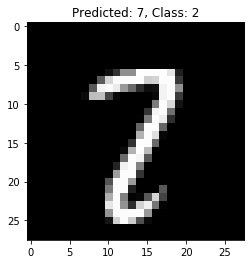

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
i = incorrect_indices[3]

plt.imshow(X_test[i], cmap='gray')
plt.title("Predicted: {}, Class: {}".format(y_pred_class[i], y_test_class[i]))
plt.show()